In [1]:
import numpy as np
from MLP import MultiLayerPerceptron, MultiLayerPerceptronBig, calculate_accuracy
from matplotlib import pyplot as plt


# Train an MLP with 2 inputs, 3-4+ hidden units and one output on the
# following examples (XOR function):
((0, 0), 0)
((0, 1), 1)
((1, 0), 1)
((1, 1), 0)
Here we will try to find the best alpha and hidden unit size for the MLP by training it on the XOR function.

In [28]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

network = MultiLayerPerceptron(2, 10, 1)
network.randomise()

# Train the MLP
for epoch in range(10000):
    network.train(X, y, 0.2)

print(network.forward(X))

[[ 0.06780946]
 [ 0.99602657]
 [ 0.99597372]
 [-0.10112516]]


C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x) / np.cosh(x)
C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: overflow encountered in cosh
  return np.sinh(x) / np.cosh(x)
C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: invalid value encountered in divide
  return np.sinh(x) / np.cosh(x)


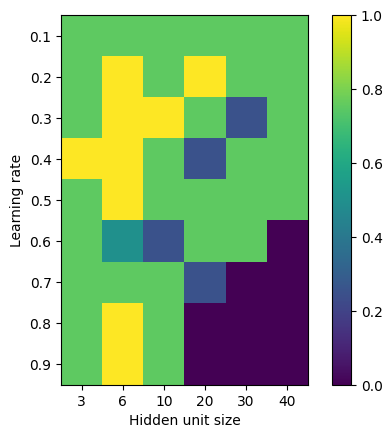

<Figure size 640x480 with 0 Axes>

In [3]:
hidden_unit_sizes = [3, 6, 10, 20, 30, 40]
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# plot alpha values against hidden unit size for the MLP on the XOR function
# use a scatter plot
total_accuracy = np.zeros((len(alpha_values), len(hidden_unit_sizes)))

def accuracy(network, I, t):
    # Calculate the accuracy of the model
    y_pred = np.round(network.forward(I))
    return np.mean(y_pred == t)

def train_and_evaluate(alpha, hidden_unit_size):
    # Create the MLP
    network = MultiLayerPerceptron(2, hidden_unit_size, 1)
    network.randomise()

    # Train the MLP
    for epoch in range(10000):
        network.train(X, y, alpha)

    # Calculate accuracy
    return accuracy(network, X, y)

for i, learning_rate in enumerate(alpha_values):
    for j, hidden_unit_size in enumerate(hidden_unit_sizes):
        total_accuracy[i, j] = train_and_evaluate(learning_rate, hidden_unit_size)

plt.imshow(total_accuracy, cmap='viridis')
plt.xticks(np.arange(len(hidden_unit_sizes)), hidden_unit_sizes)
plt.xlabel('Hidden unit size')
plt.yticks(np.arange(len(alpha_values)), alpha_values)
plt.ylabel('Learning rate')
plt.colorbar()
plt.show()
location = "figures/mlp_alpha_units"
plt.savefig(f"{location}.png")



# Now we will train the MLP on a combination of inputs

In [2]:
def calculate_mse(predictions, actual_values):
    errors = predictions - actual_values
    squared_errors = errors * errors
    mse = np.mean(squared_errors)
    return mse

def calculate_mae(predictions, actual_values):
    errors = predictions - actual_values
    absolute_errors = np.abs(errors)
    mae = np.mean(absolute_errors)
    return mae

def print_results(predictions, actual_values, threshold=0.1):
    print(f"MSE: {calculate_mse(predictions, actual_values)}")
    print(f"MAE: {calculate_mae(predictions, actual_values)}")
    print(f"accuracy: {calculate_accuracy(predictions, actual_values, threshold)}\n")


Training set:
MSE: 2.4852542005595193e-05
MAE: 0.0035952436341836476
accuracy: 0.9575

Test set:
MSE: 0.000377120385331081
MAE: 0.005795723296786898
accuracy: 0.94


small test set:
[[-0.48462002]] -0.479425538604203
[[-0.20192332]] -0.19866933079506127


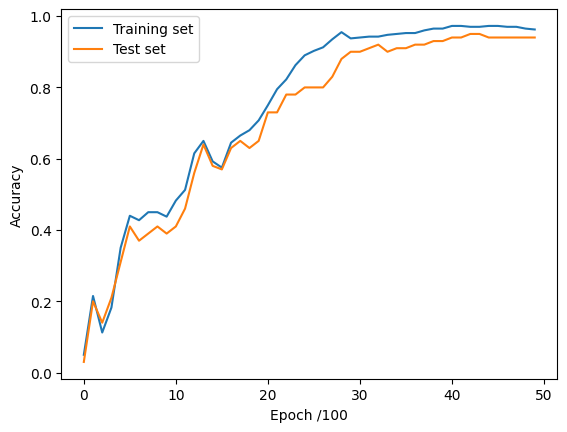

In [56]:
# Generate 500 vectors containing 4 components each. The value of each
# component should be a random number between -1 and 1. These will be
# your input vectors. The corresponding output for each vector should be
# the sin() of a combination of the components. Specifically, for inputs:
# [x1 x2 x3 x4]
# the (single component) output should be:
# sin(x1-x2+x3-x4)
# Now train an MLP with 4 inputs, at least 5 hidden units and one output
# on 400 of these examples and keep the remaining 100 for testing.

X = np.random.uniform(-1, 1, (500, 4))
y = np.sin(X[:, 0] - X[:, 1] + X[:, 2] - X[:, 3]).reshape(-1, 1)

mlp = MultiLayerPerceptronBig(4, 20, 50, 1, activation='tanh')

accuracy_list = []
# Train the MLP
for epoch in range(5000):
    for value, target in zip(X[:400], y[:400]):
        mlp.train(value, target, 0.1)

    if epoch %100 == 0:
        train_accuracy = calculate_accuracy(mlp.forward(X[:400]), y[:400], 0.01)
        test_accuracy = calculate_accuracy(mlp.forward(X[400:]), y[400:], 0.01)
        accuracy_list.append((train_accuracy, test_accuracy))

# Calculate accuracy on test set and training set
print("Training set:")
print_results(mlp.forward(X[:400]), y[:400], 0.01)

# test the MLP on the remaining 100 examples
print("Test set:")
print_results(mlp.forward(X[400:]), y[400:], 0.01)

print("\nsmall test set:")
print(mlp.forward(np.array([0.25, 0.5, 0.75, 1.0])), np.sin(0.25 - 0.5 + 0.75 - 1.0))
print(mlp.forward(np.array([0.5, 0.6, 0.7, 0.8])), np.sin(0.5 - 0.6 + 0.7 - 0.8))

# plot accuracy over time
plt.plot(accuracy_list)
plt.xlabel('Epoch /100')
plt.ylabel('Accuracy')
plt.legend(['Training set', 'Test set'])
plt.show()


## Test combinations of different learning rates and hidden unit sizes

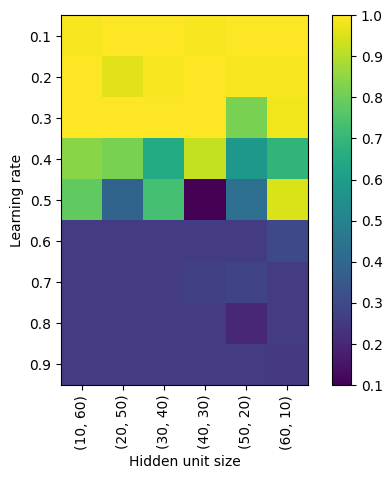

<Figure size 640x480 with 0 Axes>

In [42]:
hidden_unit_sizes = [10, 20, 30, 40, 50, 60]
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

total_accuracy = np.zeros((len(alpha_values), len(hidden_unit_sizes)))

def train_and_evaluate(alpha, h1_size, h2_size):
    # Create the MLP
    network = MultiLayerPerceptronBig(4, h1_size, h2_size, 1)

    # Train the MLP
    for epoch in range(1000):
        for value, target in zip(X[:400], y[:400]):
            network.train(value, target, alpha)

    # Calculate accuracy on test set
    return calculate_accuracy(network.forward(X[400:]), y[400:])

for i, learning_rate in enumerate(alpha_values):
    for j, hidden_unit_size in enumerate(hidden_unit_sizes):
        total_accuracy[i, j] = train_and_evaluate(learning_rate, hidden_unit_sizes[j], hidden_unit_sizes[j*-1 - 1])

# plot heat map
plt.imshow(total_accuracy, cmap='viridis')
plt.xticks(np.arange(len(hidden_unit_sizes)), zip(hidden_unit_sizes, hidden_unit_sizes[::-1]), rotation='vertical')
plt.xlabel('Hidden unit size')
plt.yticks(np.arange(len(alpha_values)), alpha_values)
plt.ylabel('Learning rate')
plt.colorbar()
plt.show()
location = "figures/mlp_learn_Sin_alpha_units"
plt.savefig(f"{location}.png")


## Train the MLP to recognise letters from the UCI letter recognition dataset with 16 parameters
https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data

In [3]:
# Load the data, first column is a letter, the rest are parameters
data = []  # This will store your parsed data

with open('letter-recognition.txt', 'r') as file:
    for line in file:
        line = line.strip().split(',')  # Split each line by comma
        label = ord(line[0]) - ord('A')  # Convert the first letter to an integer
        values = list(map(int, line[1:]))  # Convert the rest to integers
        data.append((label, values))  # Store the label and values as a tuple

# split the data into training and test sets
X_train = np.array([x[1] for x in data[:16000]])
y_train = np.array([x[0] for x in data[:16000]])

X_test = np.array([x[1] for x in data[16000:]])
y_test = np.array([x[0] for x in data[16000:]])

# since there are 26 classes, we need 26 output units, the train set has only one value which is the letter.
# we need to convert the letter to a vector of 26 values, where the index of the letter is 1 and the rest are 0
y_train = np.eye(26)[y_train]
y_test = np.eye(26)[y_test]

# train the MLP
# mlp = MultiLayerPerceptronBig(16, 20, 20, 26, activation='tanh')

# for epoch in range(50):
#     for value, target in zip(X_train, y_train):
#         mlp.train(value, target, 0.1)
#
# print("Test set:")
# pred_letters = np.argmax(mlp.forward(X_test), axis=1)
# print(f"accuracy: {calculate_accuracy(pred_letters, np.argmax(y_test, axis=1))}\n")

# Displaying the parsed data
# for label, values in data:
#     print(f"Label: {label}, Values: {values}")
print(data[0])


(19, [2, 8, 3, 5, 1, 8, 13, 0, 6, 6, 10, 8, 0, 8, 0, 8])


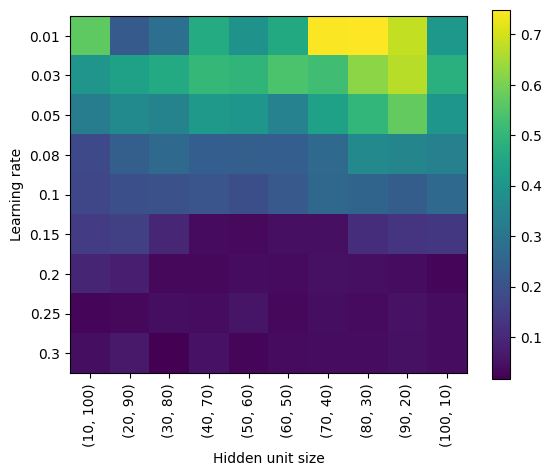

<Figure size 640x480 with 0 Axes>

In [59]:
# now to find a good combination of learning rate and hidden unit size
hidden_unit_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
alpha_values = [0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3]

total_accuracy = np.zeros((len(alpha_values), len(hidden_unit_sizes)))

def train_and_eval(alpha, h1_size, h2_size):
    # Create the MLP
    network = MultiLayerPerceptronBig(16, h1_size, h2_size, 26)

    # Train the MLP
    for epoch in range(20):
        for value, target in zip(X_train, y_train):
            network.train(value, target, alpha)

    # Calculate accuracy on test set
    return calculate_accuracy(np.argmax(network.forward(X_test), axis=1), np.argmax(y_test, axis=1))

for i, learning_rate in enumerate(alpha_values):
    for j, hidden_unit_size in enumerate(hidden_unit_sizes):
        total_accuracy[i, j] = train_and_eval(learning_rate, hidden_unit_sizes[j], hidden_unit_sizes[j*-1 - 1])

# plot heat map
plt.imshow(total_accuracy, cmap='viridis')
plt.xticks(np.arange(len(hidden_unit_sizes)), zip(hidden_unit_sizes, hidden_unit_sizes[::-1]), rotation='vertical')
plt.xlabel('Hidden unit size')
plt.yticks(np.arange(len(alpha_values)), alpha_values)
plt.ylabel('Learning rate')
plt.colorbar()
plt.show()
location = "figures/mlp_letters_alpha_units"
plt.savefig(f"{location}.png")

Epoch 0 accuracy: 0.16125


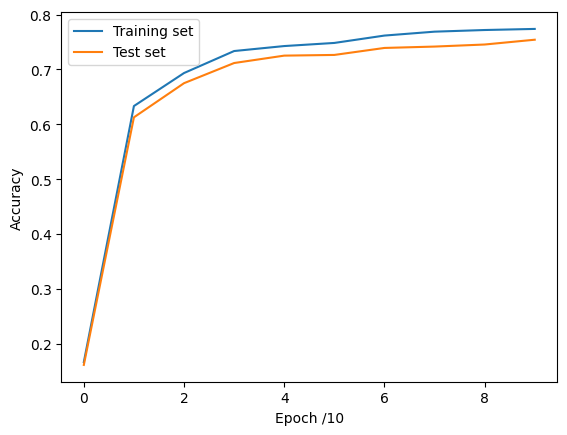

In [5]:
# we shall use a learning rate of 0.1 and network size of 20 and 60
# now we will train the MLP on the full dataset
mlp = MultiLayerPerceptronBig(16, 80, 30, 26, activation='tanh')

accuracy_list = []

alpha = 0.01
for epoch in range(100):
    for value, target in zip(X_train, y_train):
        mlp.train(value, target, alpha)

    # Calculate accuracy on test set and training set every 100 epochs
    if epoch % 10 == 0:
        pred_y_train = np.argmax(mlp.forward(X_train), axis=1)
        train_accuracy = calculate_accuracy(pred_y_train, np.argmax(y_train, axis=1))
        pred_y_test = np.argmax(mlp.forward(X_test), axis=1)
        test_accuracy = calculate_accuracy(pred_y_test, np.argmax(y_test, axis=1))

        accuracy_list.append((train_accuracy, test_accuracy))

        if epoch % 100 == 0:
            print(f"Epoch {epoch} accuracy: {test_accuracy}")
            alpha = alpha * 0.9


# plot accuracy over time
plt.plot(accuracy_list)
plt.xlabel('Epoch /10')
plt.ylabel('Accuracy')
plt.legend(['Training set', 'Test set'])
plt.show()